# Hearth Disease prediction

## Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

hd_data = pd.read_csv("../heart_2020_cleaned.csv")
hd_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [2]:
hd_data.shape

(319795, 18)

*Here we can see that there are 18 features in this dataset, with one feature being the label. The lable of the dataset is the HeartDisease feature, therefore we have 17 features and 319795 data points.*

In [3]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

*Above I used the df.info() function to check the data types of the features and to check does any feature have null values. Luckily, there are no null values in the data.*

## Visualizing the data

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64


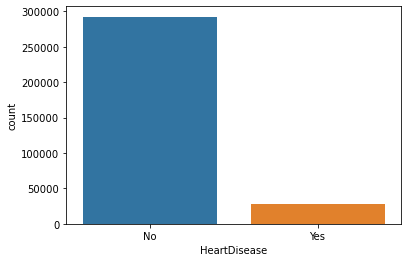

In [4]:
sns.countplot(x='HeartDisease', data=hd_data)
print(hd_data.HeartDisease.value_counts() / len(hd_data) * 100)

*From the graph above we can see that there are **91.4%** noes when it comes to heart disease and only **8.5%** yeses. This means that I am working with an imbalanced dataset.*

### Demography
Here we are going to see what effects does the demography have on heart disease.

The percentages of heart disease cases based on the age category
80 or older    19.906477
70-74          17.707230
65-69          14.981916
75-79          14.791948
60-64          12.154313
55-59           8.044423
50-54           5.052424
45-49           2.718007
40-44           1.775472
35-39           1.081358
30-34           0.825631
25-29           0.485880
18-24           0.474921
Name: AgeCategory, dtype: float64


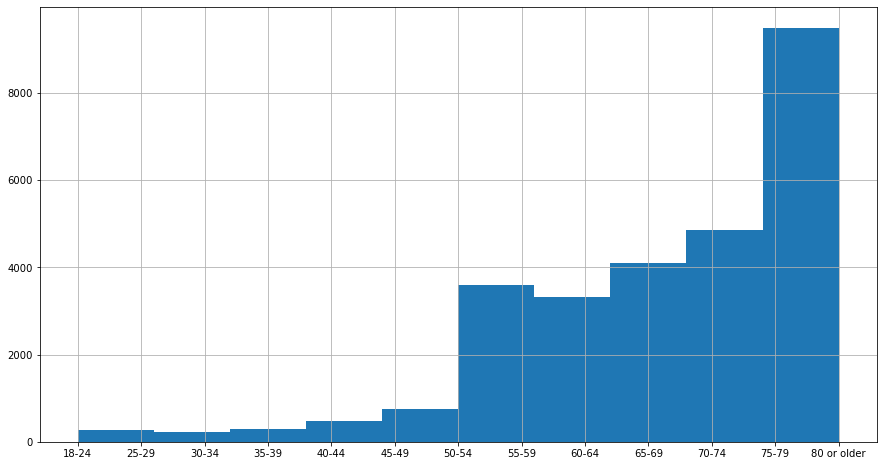

In [5]:
# Ploting the impact of age
data = hd_data[hd_data['HeartDisease'] == 'Yes'].copy()
data.sort_values("AgeCategory", inplace=True)
data.AgeCategory.hist(figsize=(15,8))
print("The percentages of heart disease cases based on the age category")
print(data.AgeCategory.value_counts() / len(data) * 100)

*From the data and graph, that is displayed above we can see that age has a big impact on the whether the person has a heart disease or not.*
*Around **87.5%** of the people that have a heart disease are above 50 years old.*

      Sex  HeartDisease
0  Female      0.066947
1    Male      0.106185


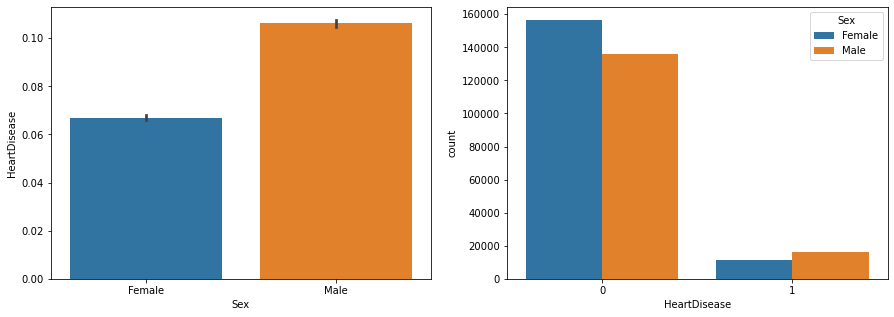

In [6]:
# Ploting the impact of sex
data = hd_data.copy()
data.HeartDisease.replace({"Yes": 1, "No": 0}, inplace=True)
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.barplot(x='Sex', y='HeartDisease', data=data, ax=axs[0])
sns.countplot(x='HeartDisease', hue='Sex', data=data, ax=axs[1])
print(data.groupby('Sex',as_index=False).HeartDisease.mean())

*We can see that in the dataset **10%** of men have a heart disease while ony **6%** of women have a heart disease. In the second graph we can see the number of people with or without a heart disease, grouped by sex. The data tells us that men are in higher risk of heart diseases then women.*

In [7]:
# function for calculating the percentage of people with heart disease based on two columns
def groupData(dataF, firstColumn, secondColumn):
    df = pd.pivot_table(dataF, index=[firstColumn, secondColumn], columns=["HeartDisease"], aggfunc='size')
    df["HeartDisease%"] = (df[1] / (df[1]+df[0])) * 100
    df = df.reset_index()
    df[f'{firstColumn}/{secondColumn}'] = df[firstColumn] + '/' + df[secondColumn]
    df = df[[f'{firstColumn}/{secondColumn}', "HeartDisease%"]]
    df.sort_values("HeartDisease%", inplace=True)
    return df

                             Race  HeartDisease
0  American Indian/Alaskan Native      0.104191
1                           Asian      0.032970
2                           Black      0.075374
3                        Hispanic      0.052576
4                           Other      0.081076
5                           White      0.091786 

HeartDisease                               Race/Sex  HeartDisease%
2                                      Asian/Female       2.236504
3                                        Asian/Male       4.284347
6                                   Hispanic/Female       4.827302
7                                     Hispanic/Male       5.744004
10                                     White/Female       6.911373
8                                      Other/Female       7.025547
4                                      Black/Female       7.257054
5                                        Black/Male       7.943626
9                                        Other/Male       9

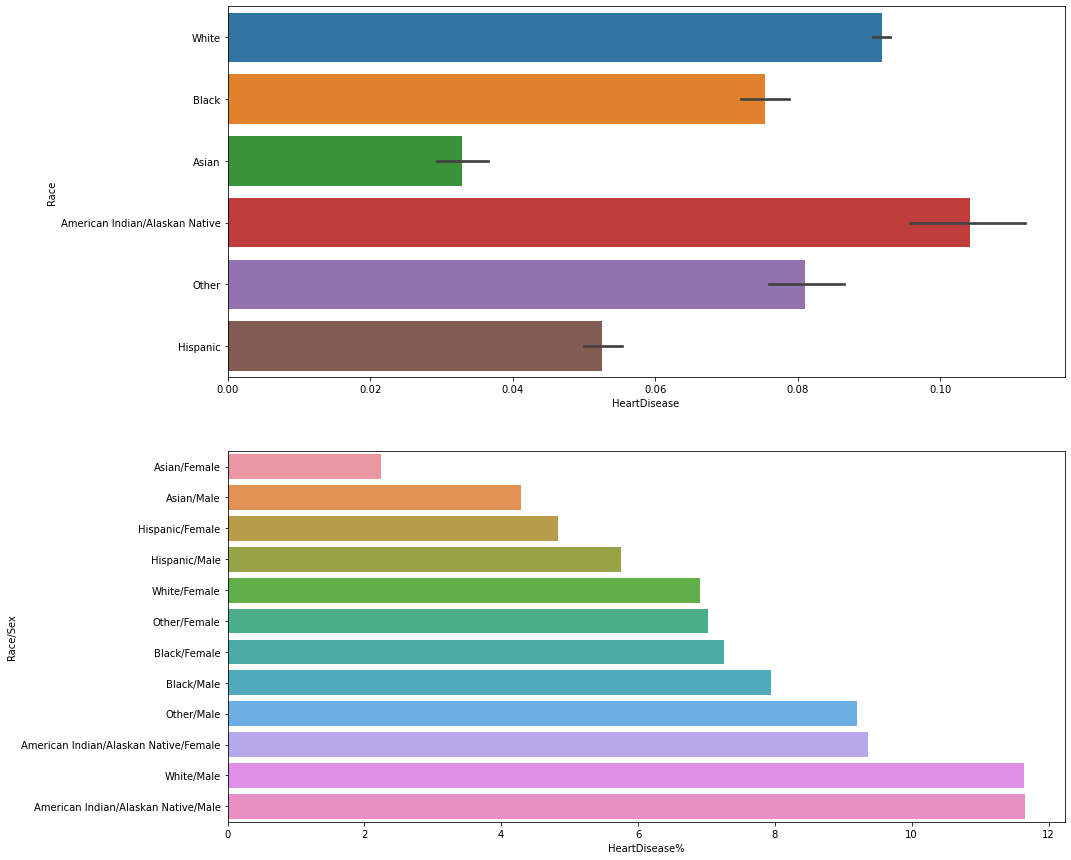

In [8]:
# ploting the impact of race
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))
sns.barplot(x='HeartDisease', y='Race', data=data, ax=axs[0])
print(data.groupby('Race',as_index=False).HeartDisease.mean(), '\n')
    
# ploting the impact of sex and race when grouped
sr_data = groupData(data, 'Race', 'Sex')
sns.barplot(x='HeartDisease%', y='Race/Sex', data=sr_data, ax=axs[1])
print(sr_data, '\n')

*The grahps and the data displayed show us that the race has a big impact when it comes to heart diseases. The second graph gives us a great showing of how for each race the men have a higher percentage than women. However, Hispanic and Asian people have a much lower percentage than others, both men and women have a smaller percentage than the other race groups. On the other end of the graph we can see that American Indian/Alaskan Native males and females have very high percentages, a percentage that is higher than almost all other Race/Sex groups (only White males are in between).*

**Conclusion:** *The dempgraphic characteristics of a person have a big impact on the risk of heart disease.*

### Lifestyle
In the previous section we saw how demography impact the risk, in this section we will look at the impact of the persons *lifestyle/life decisions*.

HeartDisease AlcoholDrinking/Smoking  HeartDisease%
2                             Yes/No       3.001674
0                              No/No       6.174627
3                            Yes/Yes       6.634365
1                             No/Yes      12.783034


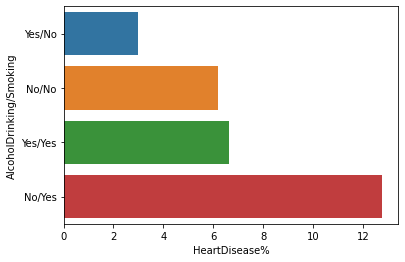

In [9]:
# ploting the impact of smoking and drinking alcohol
sa_data = groupData(data, 'AlcoholDrinking', 'Smoking')
sns.barplot(x='HeartDisease%', y='AlcoholDrinking/Smoking', data=sa_data)
print(sa_data)

*The data in the graph above shows how Drinking alcohol and smoking cigarettes impacts the risk of having a heart disease. However, the data in the dataset is, in my opinion, not well crafted. For smoking, the question to which we get and answer yes/no is "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]" and for drinking alcohol "Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week". I think that if we had more categories instead of just Yes or No, the data would make more sense.*

*However, working with data that we have we can see that smoking has a larger impact when in comes to heart disease risk. The top 2 categories with highest risk smoke cigarettes.*

HeartDisease SleepTime/PhysicalActivity  HeartDisease%
1                      Sleep over 6/Yes       6.826530
3                    Sleep under 6h/Yes       9.623806
0                       Sleep over 6/No      13.090856
2                     Sleep under 6h/No      17.809027 



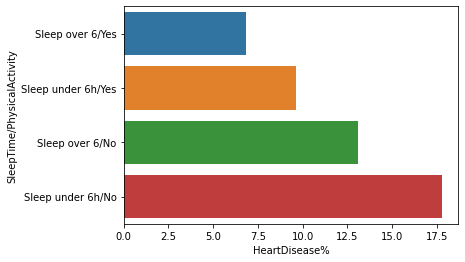

In [10]:
# categorizing the SleepTime data
data['SleepTime'] = data['SleepTime'].apply(lambda x : 'Sleep over 6' if x >= 6 else 'Sleep under 6h')

# grouping the data and ploting it
ps_data = groupData(data, 'SleepTime', 'PhysicalActivity')
sns.barplot(x='HeartDisease%', y='SleepTime/PhysicalActivity', data=ps_data)
print(ps_data, '\n')

*The graph above shows how important it is to sleep for more than 6 hours and have physical activity in your life. It is iteresting to see how much of an impact the physical activity has on the risk of having a heart disease.*

**Conclusion:** *The lifestyle of a person has a decent impact on the risk of having a heart disease. With sleep time and physical activity having a much noticable and reasonable impact.*

### Health
In this section we will see how much of an impact the health of a person has on the risk of having a heart disease.

<AxesSubplot:xlabel='HeartDisease', ylabel='Percent'>

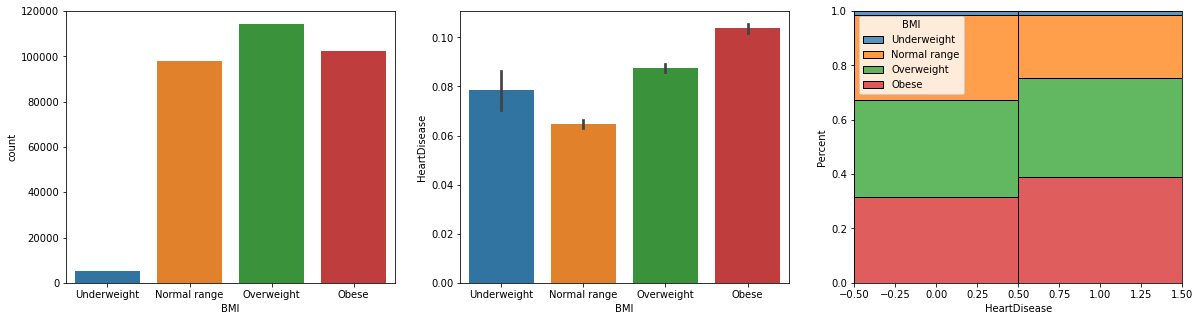

In [11]:
# ploting the impact of BMI (Body Mass Index)
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
bmi = pd.cut(x=data['BMI'], bins=[0, 18.5, 25, 30, 99], labels=['Underweight', 'Normal range', 'Overweight', 'Obese'])
sns.countplot(x=bmi, data=data, ax=axs[0])
sns.barplot(x=bmi, y='HeartDisease', data=data, ax=axs[1])
sns.histplot(
    data=data,
    x="HeartDisease",
    stat="percent",
    hue=bmi,
    multiple="fill",
    discrete=True,
    ax=axs[2]
)

*We can see from the graphs above that the BMI has a decent influence on the heart disease risk. People with normal BMI have the lowest percentage of heart disease, while people with abnormal BMI have a higher percentage, especially with a higher BMI than recommended.*

Processed data:
   Value  HeartDisease            Type  HeartDisease%
0    1.0      0.022441       GenHealth       2.244098
1    2.0      0.047261       GenHealth       4.726062
2    3.0      0.102632       GenHealth      10.263183
3    4.0      0.204285       GenHealth      20.428526
4    5.0      0.341040       GenHealth      34.103995
5    1.0      0.062985     DiffWalking       6.298455
6    5.0      0.225805     DiffWalking      22.580500
7    1.0      0.069928  PhysicalHealth       6.992786
8    2.0      0.107921  PhysicalHealth      10.792132
9    3.0      0.131101  PhysicalHealth      13.110148 



<AxesSubplot:xlabel='Value', ylabel='HeartDisease%'>

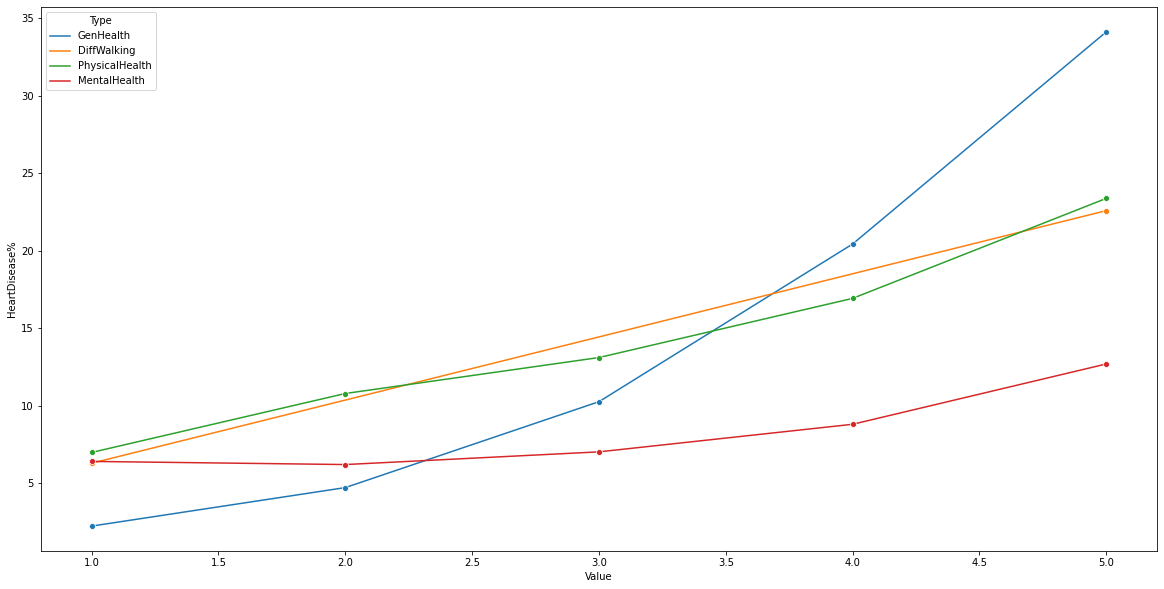

In [12]:
# making the data numerical
data["GenHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)
data["DiffWalking"].replace({"Yes": 5, "No": 1}, inplace=True)
data['PhysicalHealth'] = pd.cut(x=data['PhysicalHealth'], bins=[0, 2, 5, 10, 20, 30], labels=['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
data['MentalHealth'] = pd.cut(x=data['MentalHealth'], bins=[0, 2, 5, 10, 20, 30], labels=['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
data["PhysicalHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)
data["MentalHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)

# grouping the data and calucating the mean
ghData = data.groupby('GenHealth',as_index=False).HeartDisease.mean()
ghData['Type'] = 'GenHealth'
ghData['Value'] = ghData['GenHealth']
ghData.drop(['GenHealth'], axis=1, inplace=True)

dwData = data.groupby('DiffWalking',as_index=False).HeartDisease.mean()
dwData['Type'] = 'DiffWalking'
dwData['Value'] = dwData['DiffWalking']
dwData.drop(['DiffWalking'], axis=1, inplace=True)

phData = data.groupby('PhysicalHealth',as_index=False).HeartDisease.mean()
phData['Type'] = 'PhysicalHealth'
phData['Value'] = phData['PhysicalHealth']
phData.drop(['PhysicalHealth'], axis=1, inplace=True)

mhData = data.groupby('MentalHealth',as_index=False).HeartDisease.mean()
mhData['Type'] = 'MentalHealth'
mhData['Value'] = mhData['MentalHealth']
mhData.drop(['MentalHealth'], axis=1, inplace=True)

# appending the data to one data frame to plot it with hue using seaborn
h_df = pd.DataFrame({"Value":[], "HeartDisease": [], "Type": []})
h_df = h_df.append(ghData, ignore_index=True)
h_df = h_df.append(dwData, ignore_index=True)
h_df = h_df.append(phData, ignore_index=True)
h_df = h_df.append(mhData, ignore_index=True)
h_df['HeartDisease%'] = h_df['HeartDisease'] * 100
print("Processed data:")
print(h_df.head(10), "\n")

# ploting the data
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Value', y='HeartDisease%', hue='Type', marker="o", ax=ax, data=h_df)

*In the code above I calculated the mean of the health disease values for each health related feature and multiplied that value by 100. By doing this, I now have a percentage of people that have a heart disease based on the value of that health related feature. The data was preprocessed in a way that 1 is the best value and 5 is the worst. As we can see from the graph, for each feature as the values get worst the percentage of having a heart disease grows. General healty however has the bigest impact on the percentage as the values get worst.* 

### Disease
In this section we will see how much of an impact do other diseases have on the risk of having a heart disease.

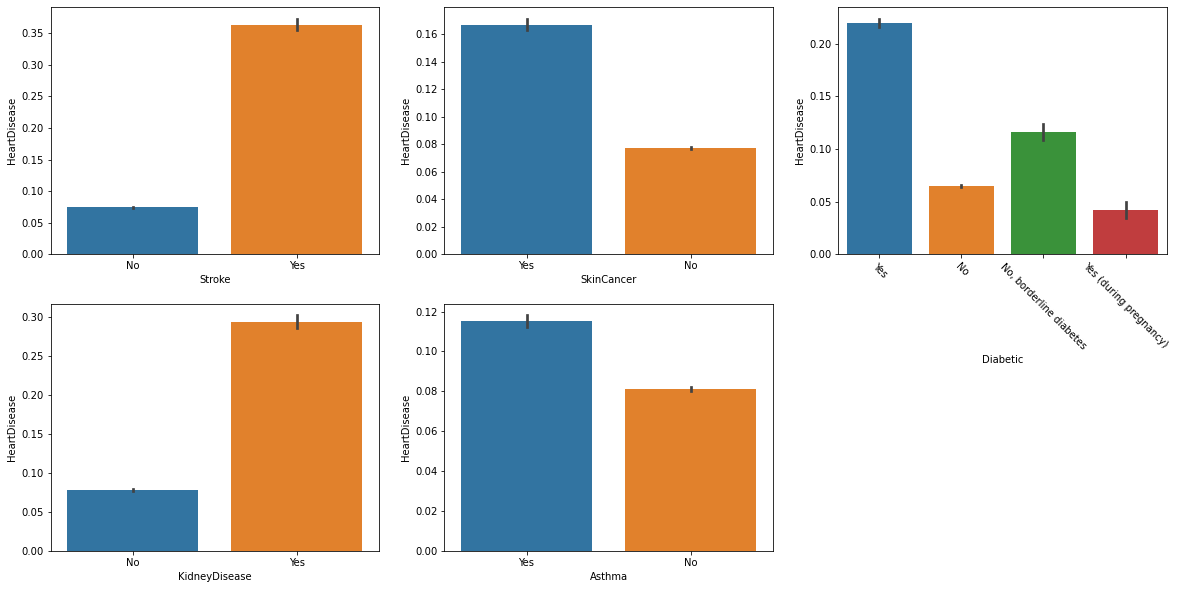

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
sns.barplot(x='Stroke', y='HeartDisease', data=data, ax=axs[0, 0])
sns.barplot(x='SkinCancer', y='HeartDisease', data=data, ax=axs[0, 1])
diabeticChart = sns.barplot(x='Diabetic', y='HeartDisease', data=data, ax=axs[0, 2])
diabeticChart.set_xticklabels(diabeticChart.get_xticklabels(), rotation=-45)
sns.barplot(x='KidneyDisease', y='HeartDisease', data=data, ax=axs[1, 0])
sns.barplot(x='Asthma', y='HeartDisease', data=data, ax=axs[1, 1])
fig.delaxes(axs[1][2])

*The graphs above show the rate of heart disease amoung people with or without a particular disease. We can see from the graphs that having any of the diseases shown above you have a greated chance of having a heart disease. Among all diseases the Stroke and KidneyDisease have the biggest impact on the rate of heart disease. With that being said it would be interesting to see how combining these two diseases would influence the rate of heart disease.*

HeartDisease Stroke/KidneyDisease  HeartDisease%
0                           No/No       6.833693
1                          No/Yes      25.835925
2                          Yes/No      33.957270
3                         Yes/Yes      53.454058 



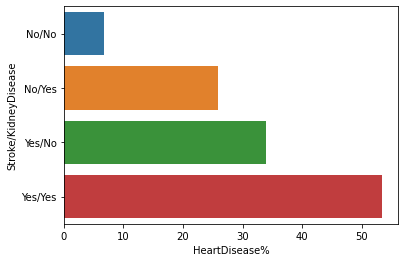

In [14]:
# grouping the data and ploting it
sk_data = groupData(data, 'Stroke', 'KidneyDisease')
sns.barplot(x='HeartDisease%', y='Stroke/KidneyDisease', data=sk_data)
print(sk_data, '\n')

*From the above graph we can see that over 50% of people that have both diseases have a heart disease.*

## Preprocessing the data
In the above sections we visualized the data and saw the impact that the features make, in this section I will be preparing the data so that it can be used in sklearns logistic regression and random forest.

P.S. This process can be easly done using the sklearns preprocessing library, however I decided to do it on my own.

In [15]:
lr_data = hd_data
lr_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [16]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

*As we already seen there are no null values in the data, however there is a lot of features with object data type. These object are actually string values which can't be used in the two models that I will be using. With this being said I will have to convert the data into integer values.*

In [17]:
# Printing all unique values for each feature of tyep object
for i in range(lr_data.shape[1]):
    if lr_data.dtypes[lr_data.columns[i]] == "object":
        print(lr_data.columns[i], ": ", lr_data.iloc[:,i].unique())

HeartDisease :  ['No' 'Yes']
Smoking :  ['Yes' 'No']
AlcoholDrinking :  ['No' 'Yes']
Stroke :  ['No' 'Yes']
DiffWalking :  ['No' 'Yes']
Sex :  ['Female' 'Male']
AgeCategory :  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race :  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic :  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity :  ['Yes' 'No']
GenHealth :  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma :  ['Yes' 'No']
KidneyDisease :  ['No' 'Yes']
SkinCancer :  ['Yes' 'No']


*Now that I have the unique values I can convert them to interger values so that the models can work with them.*

In [18]:
# Sex
lr_data["Sex"].replace({"Male": 1, "Female": 0}, inplace=True)

# AgeCategory
lr_data["AgeCategory"].replace(
    {"18-24": 1, "25-29": 2, "30-34": 3, "35-39": 4, "40-44": 5, "45-49": 6, "50-54": 7, "55-59": 8, "60-64": 9, "65-69": 10, "70-74": 11, "75-79": 12, "80 or older": 13}
    , inplace=True)

# Race
lr_data["Race"].replace({"White": 1, "Black": 2, "Asian": 3, "American Indian/Alaskan Native": 4, "Hispanic": 5, "Other": 6}, inplace=True)

# Diabetic
lr_data["Diabetic"].replace({"No": 0, "Yes": 1, "No, borderline diabetes": 2, "Yes (during pregnancy)": 3}, inplace=True)

# GenHealth
lr_data["GenHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)

# Replace 'Yes' and 'No' with 1 and 0
lr_data.replace({"Yes": 1, "No": 0}, inplace=True)

lr_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,2,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,1,0,1,2,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,1,0,1,2,8.0,0,0,0


In [19]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

*We can see that now we have no fetures with object data type, all the features are either interger of float values. This data can now be used by the models, however before using the data I will normalize the data so that each feature impacts the prediction equaly.*

In [20]:
def getReadyData(df):
    y = df["HeartDisease"].values
    X = df.drop(["HeartDisease"], axis = 1)

    # Noramlization formula: x'=(x-xmin)/(xmax-xmin) 
    # X = (X - np.min(X))/(np.max(X) - np.min(X))
    return y, X
    

y, X = getReadyData(lr_data)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,2,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,13,1,0,1,2,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,4,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,12,1,0,0,3,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,5,1,0,1,2,8.0,0,0,0


### Spliting data into training and test sets
I am spliting the data into two sets, the training and the testing set. The ratio will be 0.7 to 0.3, that means 70% of the dataset will be used for training and 30% will be used for testing.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

## Building the LogisticRegression model

In [22]:
model = LogisticRegression(solver='saga', max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, solver='saga')

In [23]:
# function for ploting the confustion matrix and printing the report
def plotMatrixWithReport(matrix, yt, yp):
    sns.heatmap(matrix, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    print(classification_report(yt, yp))
    print(f1_score(yt, yp))
    plt.show()

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87744
           1       0.54      0.10      0.17      8195

    accuracy                           0.92     95939
   macro avg       0.73      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939

0.17323640831370943


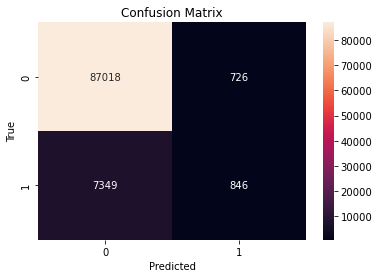

In [24]:
# making a prediction
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

plotMatrixWithReport(matrix, y_test, y_pred)

*We can see above that the accuracy is 92%, this is however very misleading. Due to our dataset having 91.4% of the outputs as 0, just by predicting that each person does't have a heart disease I would get around 90% accuracy (dependant on how data is split). What is more important to me is the recall and f1-score. The f1-score it is very bad, the same goes for the recall. The recall is more important than precision in this use case because it is worst to predict that someone does't have a heart disease when they do than the other way around (false negative). In the model above we can see that the model predicted that 7349 people don't have heart disease when they actually do.*

***WHY?***
*This happend due to the dataset being imbalanced. Luckily this can be fixed with undersampling. In the next seciton I am going to undersample the data and train a model with that data instead.*

### Undersampling the data

In [25]:
# Getting the datapoints with the label of 1 from the train dataset
X_train.insert(loc=0, column="HeartDisease", value=y_train)
data = X_train[X_train['HeartDisease'] == 1].copy()
data.shape

(19178, 18)

(47945, 18)


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

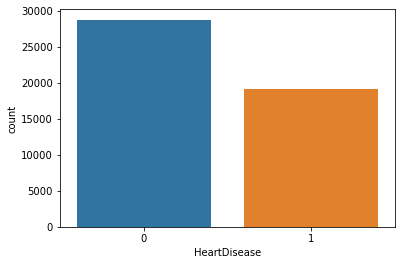

In [26]:
# Appending the datapoints with the label of 0
# However I am appending more data with 1 values to have a more realistic dataset
data = data.append(X_train[X_train['HeartDisease'] == 0].copy().head(int(data.shape[0]*1.5)), ignore_index=True)
print(data.shape)
sns.countplot(x='HeartDisease', data=data)

*Now the data is much more balanced then it was before.*

In [27]:
y, X = getReadyData(data)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,24.03,1,0,1,10.0,0.0,1,0,11,1,0,1,4,9.0,1,0,0
1,24.41,0,0,0,0.0,0.0,0,1,8,1,0,1,2,7.0,1,0,0
2,33.67,1,0,0,0.0,0.0,0,1,10,6,1,1,3,7.0,0,0,0
3,26.63,1,0,0,20.0,10.0,0,1,9,1,0,1,3,7.0,0,0,0
4,30.02,1,0,0,0.0,0.0,1,1,11,5,1,0,5,4.0,0,1,0


In [28]:
resamp_model = LogisticRegression(solver='saga', max_iter=400)
resamp_model.fit(X, y)

LogisticRegression(max_iter=400, solver='saga')

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     87744
           1       0.27      0.67      0.38      8195

    accuracy                           0.81     95939
   macro avg       0.62      0.75      0.64     95939
weighted avg       0.90      0.81      0.85     95939

0.38126188418323254


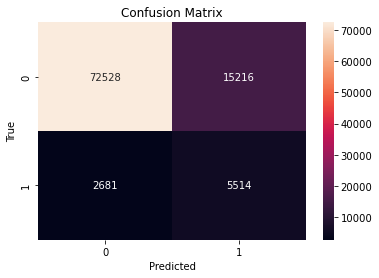

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87744
           1       0.54      0.10      0.17      8195

    accuracy                           0.92     95939
   macro avg       0.73      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939

0.17323640831370943


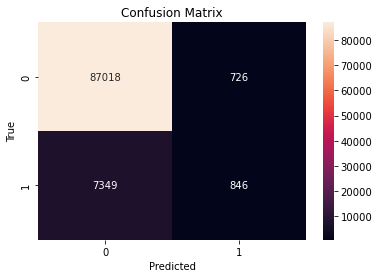

In [29]:
# making a prediction using the old test set
resamp_y_pred = resamp_model.predict(X_test)

resamp_matrix = confusion_matrix(y_test, resamp_y_pred)

plotMatrixWithReport(resamp_matrix, y_test, resamp_y_pred)
plotMatrixWithReport(matrix, y_test, y_pred)

*So, in this section I undersampled the data and trained the model on that data. There was no need to split the data due to me using the same testing data on both models so that we can directly compare them. Above there are two confusion matrices, the first one is from the undersampled data and the second one is from the first model. The model with the undersampled data had worst accuracy, however the recall and f1-score got better. This shows that the undersampling helped and the model that was trained on the undersampled data is much better at predicting the positive (1) outcome.*

## Random Forest
In this section I will be creating the random forest classifier. I will use the old sets that were split, both undersampled and the normal data so that I can compare the algorithm with itself and the previous algorithm.

In [30]:
# preparing the train data
X_train.drop(['HeartDisease'], axis=1, inplace=True)

# instantiating the classifier and fitting the data
rf_clf = RandomForestClassifier(criterion='entropy')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87744
           1       0.35      0.12      0.18      8195

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.56     95939
weighted avg       0.87      0.91      0.88     95939

0.17708808763121864


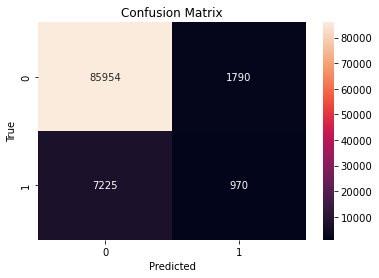

In [31]:
# making a prediction and ploting the matrix
rf_y_pred = rf_clf.predict(X_test)
rf_matrix = confusion_matrix(y_test,rf_y_pred)
plotMatrixWithReport(rf_matrix, y_test, rf_y_pred)

In [32]:
# instantiating the classifier and fitting the undersampled data
us_rf_clf = RandomForestClassifier(criterion='entropy')
us_rf_clf.fit(X, y)

RandomForestClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     87744
           1       0.23      0.69      0.34      8195

    accuracy                           0.78     95939
   macro avg       0.60      0.74      0.60     95939
weighted avg       0.90      0.78      0.82     95939

0.3439116197937387


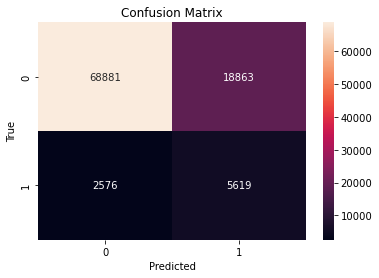

In [33]:
# making a prediction and ploting the matrix
us_rf_y_pred = us_rf_clf.predict(X_test)
us_rf_matrix = confusion_matrix(y_test,us_rf_y_pred)
plotMatrixWithReport(us_rf_matrix, y_test, us_rf_y_pred)

*We can see that the random forest model is very much similar to the logistic regression one. When working with imbalance data it performs a bit better than the logistic regression (looking at the f1-score and the recall for reference), however when working with somewhat balanced data random forest was better in predicting the postive outcome but much worse in predicting the negativ outcome.*

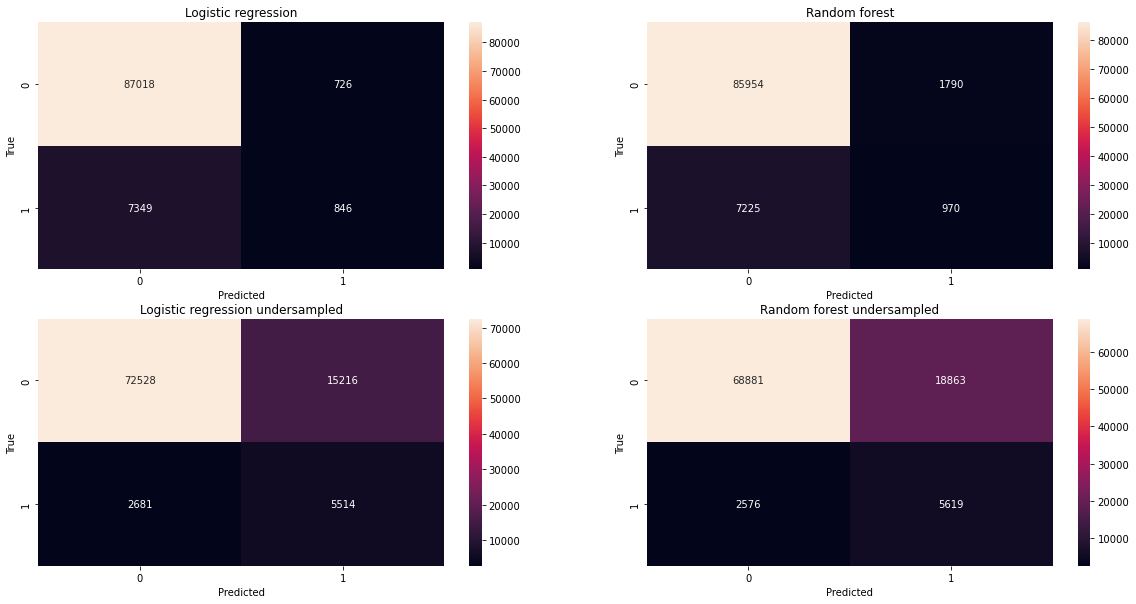

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
s = sns.heatmap(matrix, annot=True, fmt="d", ax=axs[0,0])
s.set(xlabel='Predicted', ylabel='True', title="Logistic regression")

s = sns.heatmap(rf_matrix, annot=True, fmt="d", ax=axs[0,1])
s.set(xlabel='Predicted', ylabel='True', title="Random forest")

s = sns.heatmap(resamp_matrix, annot=True, fmt="d", ax=axs[1,0])
s.set(xlabel='Predicted', ylabel='True', title="Logistic regression undersampled")

s = sns.heatmap(us_rf_matrix, annot=True, fmt="d", ax=axs[1,1])
s.set(xlabel='Predicted', ylabel='True', title="Random forest undersampled")
plt.show()

*When looking at the above confusion matrices we can see that no matter what the data is random forest made less critical mistakes (false negatives), however the accuracy is worst no mater what data is used. Making a decision what algorithm to choose depends on the use case of the algorithm. In my case where I would like to give people the percentage risk of them having a heart disease I think that the logistic regression model fits better, because it is a more balanced model and is decent at predicting both the positiv and the negative outcomes.*

In [35]:
print(model.predict_proba([[24.03,1,0,1,10.0,0.0,1,0,11,1,0,1,4,9.0,1,0,0]])[0, 1] * 100, "%")
print(resamp_model.predict_proba([[24.03,1,0,1,10.0,0.0,1,0,11,1,0,1,4,9.0,1,0,0]])[0, 1] * 100, "%")

43.74271632227388 %
87.33048734154465 %


/home/vedranselak/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/vedranselak/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
